# Import necessary libraries

In [1]:
import pandas as pd
!pip install gensim scikit-learn
!pip install ucimlrepo
import numpy as np



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import database

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
data = breast_cancer.data.features
data['class'] = breast_cancer.data.targets  # Add the target column as 'class'

In [3]:
# Convert all columns to string data type to prevent date interpretation
data = data.astype(str)  

In [4]:
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n" + "-"*40 + "\n")

Unique values in 'age':
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

----------------------------------------

Unique values in 'menopause':
['premeno' 'ge40' 'lt40']

----------------------------------------

Unique values in 'tumor-size':
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '9-May' '45-49']

----------------------------------------

Unique values in 'inv-nodes':
['0-2' '8-Jun' '11-Sep' '5-Mar' '15-17' '14-Dec' '24-26']

----------------------------------------

Unique values in 'node-caps':
['no' 'yes' 'nan']

----------------------------------------

Unique values in 'deg-malig':
['3' '2' '1']

----------------------------------------

Unique values in 'breast':
['left' 'right']

----------------------------------------

Unique values in 'breast-quad':
['left_low' 'right_up' 'left_up' 'right_low' 'central' 'nan']

----------------------------------------

Unique values in 'irradiat':
['no' 'yes']

----------------------------------------

U

In [5]:
# Correct misencoded values in 'tumor-size'
data['tumor-size'] = data['tumor-size'].replace({
    '14-Oct': '10-14',
    '9-May': '5-9'
})

# Correct misencoded values in 'inv-nodes'
data['inv-nodes'] = data['inv-nodes'].replace({
    '8-Jun': '6-8',
    '5-Mar': '3-5',
    '11-Sep': '9-11',
    '14-Dec': '12-14'
})

# Display unique values in 'tumor-size' and 'inv-nodes' to verify the corrections
print("Unique values in 'tumor-size':")
print(data['tumor-size'].unique())
print("\nUnique values in 'inv-nodes':")
print(data['inv-nodes'].unique())


Unique values in 'tumor-size':
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']

Unique values in 'inv-nodes':
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']


# k-means clustering using the scikit learn package 

## Import libraries

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## k-means clustering

In [7]:
# Handle missing values
data['node-caps'] = data['node-caps'].replace("nan", "Unknown")
data['breast-quad'] = data['breast-quad'].replace("nan", "Unknown")

# Preprocess the data
# Convert categorical variables to numerical values using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Remove the class column for clustering
data_features = data_encoded.drop("class", axis=1, errors="ignore")

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Apply PCA for dimensionality reduction (optional for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Calculate SSE for different values of k
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

# Print SSE values for each k
for k, sse_value in zip(k_values, sse):
    print(f"k={k}: SSE={sse_value:.4f}")

k=1: SSE=1557.1722
k=2: SSE=861.7251
k=3: SSE=448.6121
k=4: SSE=335.2249
k=5: SSE=260.1795
k=6: SSE=222.5419
k=7: SSE=195.3016
k=8: SSE=164.8126
k=9: SSE=141.0270
k=10: SSE=127.9892


# Using Matplotlib determine the optimal number of clusters (k) 

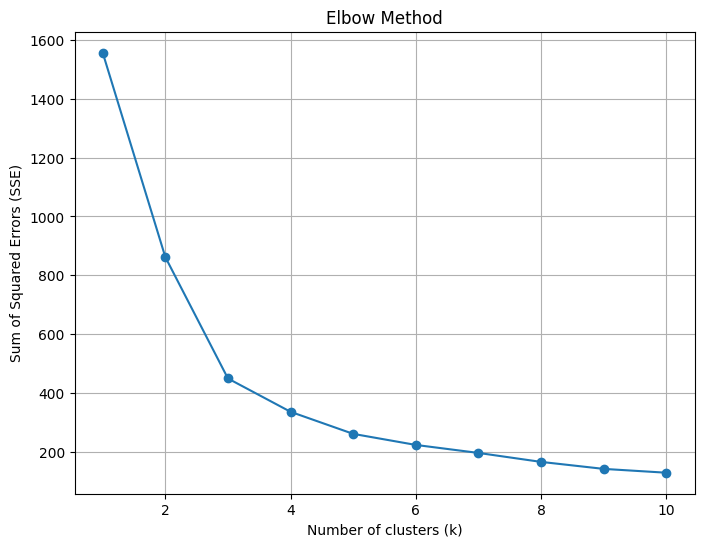


The presented graph illustrates the Elbow Method, aimed at identifying the optimal number of clusters in the dataset. 
The x-axis represents the number of clusters (k), while the y-axis displays the Sum of Squared Errors (SSE).
The interpretation focuses on the point where the reduction in SSE begins to stabilize, which is considered the optimal number of clusters. 
In this graph, the "elbow" appears in three clusters. 
This suggests that grouping the data into three clusters is the most suitable option, 
as increasing the number of clusters beyond this point does not significantly improve the SSE.



In [8]:
# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

# Determine the optimal number of clusters from the plot (e.g., k=3 as an example)
optimal_k = 3

# Fit k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Explanation
print("""
The presented graph illustrates the Elbow Method, aimed at identifying the optimal number of clusters in the dataset. 
The x-axis represents the number of clusters (k), while the y-axis displays the Sum of Squared Errors (SSE).
The interpretation focuses on the point where the reduction in SSE begins to stabilize, which is considered the optimal number of clusters. 
In this graph, the "elbow" appears in three clusters. 
This suggests that grouping the data into three clusters is the most suitable option, 
as increasing the number of clusters beyond this point does not significantly improve the SSE.
""")

# Plot the optimal clusters with their centroids

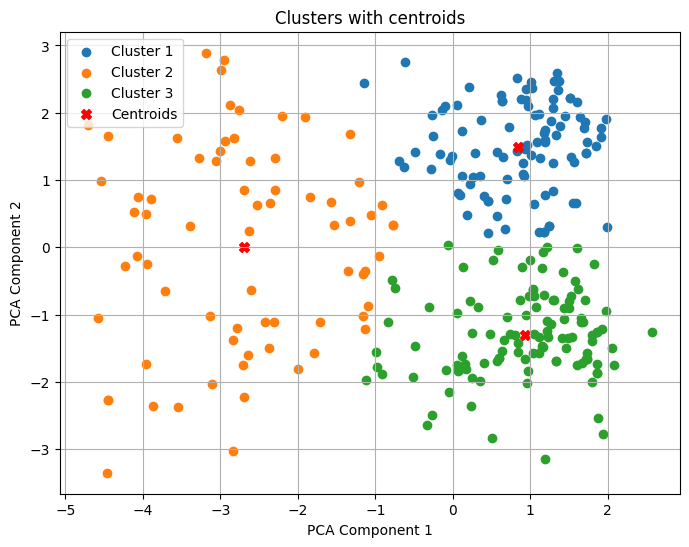


In this graph, the three clusters are visualized based on the two components of the PCA. 
The centroids are represented by an "X," and each cluster is depicted in a distinct color, highlighting the separation between the groups.



In [9]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        data_pca[labels == cluster, 0],
        data_pca[labels == cluster, 1],
        label=f'Cluster {cluster+1}'
    )
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=50, c='red', label='Centroids', marker='X'
)
plt.title('Clusters with centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Explanation
print("""
In this graph, the three clusters are visualized based on the two components of the PCA. 
The centroids are represented by an "X," and each cluster is depicted in a distinct color, highlighting the separation between the groups.
""")